In [1]:
import h5py
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model
import matplotlib.pyplot as plt
import os

np.random.seed(2018)


/home/wson/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plot_history(history):
    # list all data in history
    # print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Read feature：

In [3]:
h5_file = "feature_Xception.h5"

with h5py.File(h5_file, 'r') as h:
    X_train = np.array(h['train'])
    X_val = np.array(h['val'])
    X_test = np.array(h['test'])
    y_train = np.array(h['train_label'])
    y_val = np.array(h['val_label'])

X_train, y_train = shuffle(X_train, y_train)


In [4]:
print(X_train.shape)

(19944, 2048)


### Test model:

In [4]:
if os.path.exists('Xception_top_layers.h5'):
    model = load_model('Xception_top_layers.h5')
    loss = model.evaluate(X_val, y_val, batch_size=512, verbose=1)
    print(loss)

4985/4985 [==============================] - 0s 57us/step
[0.030538695734536037, 0.9907723155877775]


### Model adjustment:

In [7]:
input_tensor = Input(X_train.shape[1:])
x = Dropout(0.6)(input_tensor)
# x = Dense(512, activation=None, name='top_dense')(x)
# x = BatchNormalization(name='top_bn')(x)
# x = Activation('relu')(x)
# x = Dropout(0.8)(x)
x = Dense(1, activation='sigmoid', name='top_sigmoid')(x)
model = Model(input_tensor, x)

opt = optimizers.Adam(lr=1e-3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val))

Train on 19944 samples, validate on 4985 samples
Epoch 1/10
19944/19944 [==============================] - 1s 38us/step - loss: 0.1820 - acc: 0.9378 - val_loss: 0.0593 - val_acc: 0.9864
Epoch 2/10
19944/19944 [==============================] - 0s 24us/step - loss: 0.0571 - acc: 0.9848 - val_loss: 0.0442 - val_acc: 0.9878
Epoch 3/10
19944/19944 [==============================] - 0s 18us/step - loss: 0.0459 - acc: 0.9858 - val_loss: 0.0388 - val_acc: 0.9884
Epoch 4/10
19944/19944 [==============================] - 0s 21us/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.0365 - val_acc: 0.9884
Epoch 5/10
19944/19944 [==============================] - 0s 23us/step - loss: 0.0388 - acc: 0.9885 - val_loss: 0.0347 - val_acc: 0.9890
Epoch 6/10
19944/19944 [==============================] - 0s 24us/step - loss: 0.0357 - acc: 0.9889 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 7/10
19944/19944 [==============================] - 1s 28us/step - loss: 0.0337 - acc: 0.9886 - val_loss: 0.0331 - val_acc:

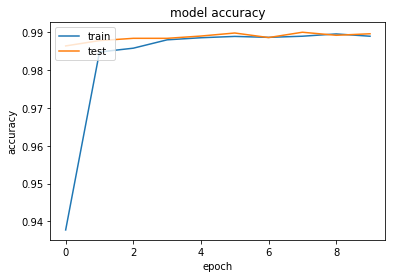

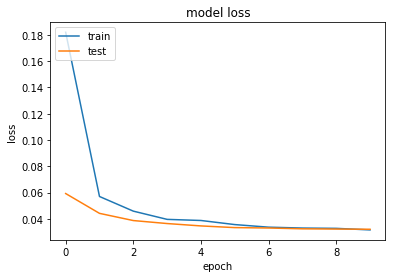

In [9]:
plot_history(history)

In [10]:
if os.path.isfile('Xception_top_layers.h5'):
    os.remove('Xception_top_layers.h5')

model.save('Xception_top_layers.h5')

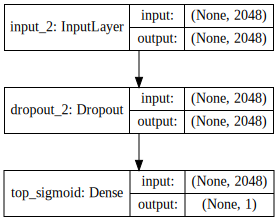

In [12]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Train in total training data:

In [57]:
model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), batch_size=256, epochs=10, validation_split=0)

Epoch 1/10
24929/24929 [==============================] - 2s 73us/step - loss: 0.0712 - acc: 0.9737
Epoch 2/10
24929/24929 [==============================] - 1s 27us/step - loss: 0.0414 - acc: 0.9852
Epoch 3/10
24929/24929 [==============================] - 1s 30us/step - loss: 0.0372 - acc: 0.9868
Epoch 4/10
24929/24929 [==============================] - 1s 31us/step - loss: 0.0349 - acc: 0.9879
Epoch 5/10
24929/24929 [==============================] - 1s 33us/step - loss: 0.0352 - acc: 0.9884
Epoch 6/10
24929/24929 [==============================] - 1s 31us/step - loss: 0.0334 - acc: 0.9882
Epoch 7/10
24929/24929 [==============================] - 1s 30us/step - loss: 0.0325 - acc: 0.9884
Epoch 8/10
24929/24929 [==============================] - 1s 27us/step - loss: 0.0314 - acc: 0.9887
Epoch 9/10
24929/24929 [==============================] - 1s 28us/step - loss: 0.0319 - acc: 0.9885
Epoch 10/10
24929/24929 [==============================] - 1s 34us/step - loss: 0.0300 - acc: 0.9895

### Predict:

In [58]:
y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)


12500/12500 [==============================] - 2s 134us/step


In [59]:
df = pd.read_csv("sampleSubmission.csv")

image_size = (229, 229)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("test", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.loc[index-1, ['label']] = y_pred[i]

df.to_csv('pred.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
8,9,0.005
9,10,0.005
